# Assignment Objective
Build a model to predict the house prices

# Import Libraries

In [32]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import the dataset

In [33]:
# Import dataset as a pandas DataFrame
df = pd.read_excel('./dataset1.xlsx')

# Exploratory Data Analysis

## View 5 random samples

In [34]:
df.sample(5)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
3197     -118.49     34.26                  25         8389          1872.0   
7270     -118.18     33.82                  43          284            65.0   
18145    -119.18     34.28                  17         4526           717.0   
2482     -115.49     32.67                  24         1266           275.0   
5572     -117.90     34.06                  33         1701           290.0   

       population  households  median_income  median_house_value  \
3197         4483        1747         3.5497              261300   
7270          167          68         4.2500              207500   
18145        2088         655         5.6885              268200   
2482         1083         298         1.4828               73100   
5572          831         275         5.4469              274700   

      ocean_proximity  
3197        <1H OCEAN  
7270       NEAR OCEAN  
18145      NEAR OCEAN  
2482           INLAND  
5572        <1H OCEAN

## View the number of rows and columns in the dataset

In [35]:
df.shape

(18565, 10)

## One-Hot Encoding for Ocean Proximity

In [36]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore').set_output(transform='pandas')
ohe_transform = encoder.fit_transform(df[['ocean_proximity']])
df = pd.concat([df,ohe_transform], axis=1).drop(columns=['ocean_proximity'])

In [37]:
df.dtypes

longitude                     float64
latitude                      float64
housing_median_age              int64
total_rooms                     int64
total_bedrooms                float64
population                      int64
households                      int64
median_income                 float64
median_house_value              int64
ocean_proximity_<1H OCEAN     float64
ocean_proximity_INLAND        float64
ocean_proximity_ISLAND        float64
ocean_proximity_NEAR BAY      float64
ocean_proximity_NEAR OCEAN    float64
dtype: object

## View number of missing values in each column

In [38]:
df.isnull().sum()

longitude                       0
latitude                        0
housing_median_age              0
total_rooms                     0
total_bedrooms                189
population                      0
households                      0
median_income                   0
median_house_value              0
ocean_proximity_<1H OCEAN       0
ocean_proximity_INLAND          0
ocean_proximity_ISLAND          0
ocean_proximity_NEAR BAY        0
ocean_proximity_NEAR OCEAN      0
dtype: int64

## Using KNN Imputer for missing values

In [39]:
# total_bedrooms has 189 missing values
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)
imputed_array =  imputer.fit_transform(df)
df = pd.DataFrame(imputed_array, columns=df.columns, index=df.index)

In [40]:
df.isnull().sum()

longitude                     0
latitude                      0
housing_median_age            0
total_rooms                   0
total_bedrooms                0
population                    0
households                    0
median_income                 0
median_house_value            0
ocean_proximity_<1H OCEAN     0
ocean_proximity_INLAND        0
ocean_proximity_ISLAND        0
ocean_proximity_NEAR BAY      0
ocean_proximity_NEAR OCEAN    0
dtype: int64

In [41]:
df.sample()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
3437    -118.45      34.2                19.0       3666.0          1150.0   

      population  households  median_income  median_house_value  \
3437      2657.0      1090.0         2.9688            202100.0   

      ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  \
3437                        1.0                     0.0   

      ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
3437                     0.0                       0.0   

      ocean_proximity_NEAR OCEAN  
3437                         0.0

## View the distribution of features and target variable

In [42]:
# View distribution of  variables
df.hist(bins=50, figsize=(15, 15))
plt.show()

## Target variable has outliers

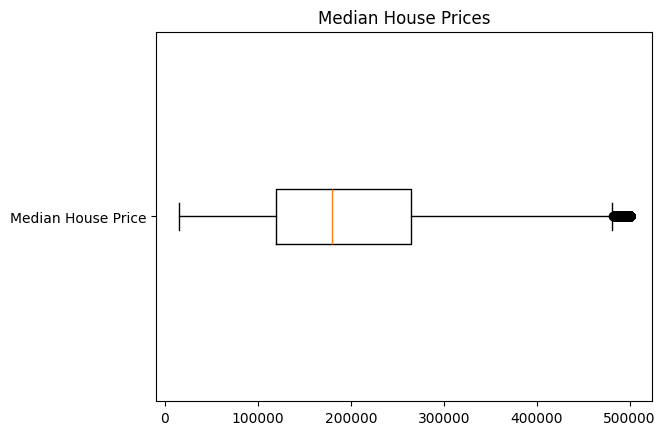

In [43]:
plt.boxplot(df['median_house_value'], tick_labels=['Median House Price'],vert=False) 
plt.title('Median House Prices') 
plt.show()

## Remove outliers in target variable

In [44]:
# Remove outliers
min_value = df['median_house_value'].min()
q1,q3 = np.percentile(df['median_house_value'],[25,75])
median = df['median_house_value'].median()
max_value = df['median_house_value'].max()
min_value,q1,q3,median,max_value

(14999.0, 119300.0, 264400.0, 179400.0, 500001.0)

In [45]:
iqr = q3-q1
lower_boundary = q1 - 1.5*iqr
upper_boundary = q3 + 1.5*iqr
range = [lower_boundary,upper_boundary]
range

[-98350.0, 482050.0]

In [46]:
# outliers
outlier = df[(df['median_house_value'] < lower_boundary) | (df['median_house_value']> upper_boundary)]
outlier

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
82       -122.27     37.80                52.0        249.0            78.0   
414      -122.25     37.87                52.0        609.0           236.0   
444      -122.25     37.86                48.0       2153.0           517.0   
448      -122.24     37.86                52.0       1668.0           225.0   
449      -122.24     37.85                52.0       3726.0           474.0   
...          ...       ...                 ...          ...             ...   
18366    -118.90     34.14                35.0       1503.0           263.0   
18370    -118.69     34.18                11.0       1177.0           138.0   
18371    -118.80     34.19                 4.0      15572.0          2222.0   
18380    -118.69     34.21                10.0       3663.0           409.0   
18387    -118.85     34.27                50.0        187.0            33.0   

       population  households  median_income  median_house_value  \
82          396.0        85.0         1.2434            500001.0   
414        1349.0       250.0         1.1696            500001.0   
444        1656.0       459.0         3.0417            489600.0   
448         517.0       214.0         7.8521            500001.0   
449        1366.0       496.0         9.3959            500001.0   
...           ...         ...            ...                 ...   
18366       576.0       216.0         5.1457            500001.0   
18370       415.0       119.0        10.0472            500001.0   
18371      5495.0      2152.0         8.6499            500001.0   
18380      1179.0       371.0        12.5420            500001.0   
18387       130.0        35.0         3.3438            500001.0   

       ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  \
82                           0.0                     0.0   
414                          0.0                     0.0   
444                          0.0                     0.0   
448                          0.0                     0.0   
449                          0.0                     0.0   
...                          ...                     ...   
18366                        1.0                     0.0   
18370                        1.0                     0.0   
18371                        1.0                     0.0   
18380                        1.0                     0.0   
18387                        1.0                     0.0   

       ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
82                        0.0                       1.0   
414                       0.0                       1.0   
444                       0.0                       1.0   
448                       0.0                       1.0   
449                       0.0                       1.0   
...                       ...                       ...   
18366                     0.0                       0.0   
18370                     0.0                       0.0   
18371                     0.0                       0.0   
18380                     0.0                       0.0   
18387                     0.0                       0.0   

       ocean_proximity_NEAR OCEAN  
82                            0.0  
414                           0.0  
444                           0.0  
448                           0.0  
449                           0.0  
...                           ...  
18366                         0.0  
18370                         0.0  
18371                         0.0  
18380                         0.0  
18387                         0.0  

[964 rows x 14 columns]

In [47]:
df = df[(df['median_house_value'] > lower_boundary) & (df['median_house_value'] < upper_boundary)]

<Axes: >

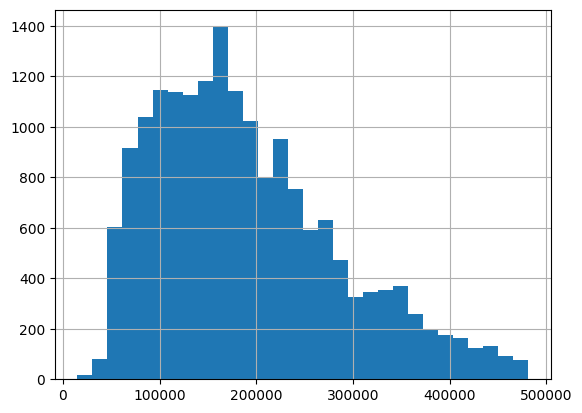

In [48]:
df['median_house_value'].hist(bins=30)

In [49]:
df.shape

(17601, 14)

## View the datatype of each column

In [50]:
df.dtypes

longitude                     float64
latitude                      float64
housing_median_age            float64
total_rooms                   float64
total_bedrooms                float64
population                    float64
households                    float64
median_income                 float64
median_house_value            float64
ocean_proximity_<1H OCEAN     float64
ocean_proximity_INLAND        float64
ocean_proximity_ISLAND        float64
ocean_proximity_NEAR BAY      float64
ocean_proximity_NEAR OCEAN    float64
dtype: object

# Linear Regression using original features

In [51]:
y_original = df['median_house_value']
X_original = df
X_original = df.drop('median_house_value',axis=1)

In [52]:
from sklearn.model_selection import train_test_split
X_train_original, X_test_original, y_train_original,y_test_original = train_test_split(X_original,y_original,test_size=0.2,random_state=4)

In [53]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler_original = StandardScaler()
X_train_scaled_original = scaler_original.fit_transform(X_train_original)
X_test_scaled_original = scaler_original.transform(X_test_original)

In [54]:
# Train the Linear Regression Model
# Import LinearRegression.
from sklearn.linear_model import LinearRegression
# Instantiate linear regression model.
model_original = LinearRegression()

model_original.fit(X_train_scaled_original, y_train_original)

y_pred_original = model_original.predict(X_test_scaled_original)

In [55]:
# Evaluate Performance
from sklearn.metrics import mean_squared_error, r2_score
# Calculate and print R^2 score.
r2 = r2_score(y_test_original, y_pred_original)
print(f"R-squared: {r2:.4f}")

# Calculate and print MSE.
mse = mean_squared_error(y_test_original, y_pred_original)
print(f"Mean squared error: {mse:.4f}")


# Calculate and print RMSE.
rmse = mse ** 0.5
print(f"Root mean squared error: {rmse:.4f}")

R-squared: 0.5873
Mean squared error: 3684234376.6415
Root mean squared error: 60697.8943


In [56]:
# Compute residuals.
residuals = y_test_original, y_pred_original


# Create plots.
plt.figure(figsize=(12,5))


# Plot 1: Residuals Distribution.
plt.subplot(1,2,1)
sns.histplot(residuals, bins=30, kde=True, color="blue")
plt.axvline(x=0, color='red', linestyle='--')
plt.title("Residuals Distribution")
plt.xlabel("Residuals (y_actual - y_predicted)")
plt.ylabel("Frequency")


# Plot 2: Regression Fit (Actual vs Predicted).
plt.subplot(1,2,2)
sns.scatterplot(x=y_test_original, y=y_pred_original, alpha=0.5)
plt.plot([min(y_test_original), max(y_test_original)], [min(y_test_original), max(y_test_original)], color='red', linestyle='--')  # Perfect fit line
plt.title("Regression Fit: Actual vs Predicted")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")


# Show plots.
plt.tight_layout()
plt.show()

# Linear Regression: Adding new features

### Add new features

In [57]:
# Add new features
df['rooms_per_household'] = df['total_rooms'] / df['households']
df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']
df['population_per_household'] = df['population'] / df['households']
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.25     37.85                52.0       1627.0           280.0   
3    -122.25     37.85                52.0        919.0           213.0   
4    -122.25     37.84                52.0       2535.0           489.0   

   population  households  median_income  median_house_value  \
0       322.0       126.0         8.3252            452600.0   
1      2401.0      1138.0         8.3014            358500.0   
2       565.0       259.0         3.8462            342200.0   
3       413.0       193.0         4.0368            269700.0   
4      1094.0       514.0         3.6591            299200.0   

   ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  ocean_proximity_ISLAND  \
0                        0.0                     0.0                     0.0   
1                        0.0                     0.0                     0.0   
2                        0.0                     0.0                     0.0   
3                        0.0                     0.0                     0.0   
4                        0.0                     0.0                     0.0   

   ocean_proximity_NEAR BAY  ocean_proximity_NEAR OCEAN  rooms_per_household  \
0                       1.0                         0.0             6.984127   
1                       1.0                         0.0             6.238137   
2                       1.0                         0.0             6.281853   
3                       1.0                         0.0             4.761658   
4                       1.0                         0.0             4.931907   

   bedrooms_per_room  population_per_household  
0           0.146591                  2.555556  
1           0.155797                  2.109842  
2           0.172096                  2.181467  
3           0.231774                  2.139896  
4           0.192899                  2.128405

In [58]:
# Remove total_rooms, total_bedrooms, population_per_household
df = df.drop(['total_rooms','total_bedrooms','population'], axis=1)

In [59]:
df.sample()

longitude  latitude  housing_median_age  households  median_income  \
3404    -118.43     34.17                32.0       621.0         3.4449   

      median_house_value  ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  \
3404            292900.0                        1.0                     0.0   

      ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
3404                     0.0                       0.0   

      ocean_proximity_NEAR OCEAN  rooms_per_household  bedrooms_per_room  \
3404                         0.0               5.1562           0.217364   

      population_per_household  
3404                  2.533011

In [60]:
df.hist(bins=50, figsize=(15, 15))
plt.show()

In [61]:
# View correlation of median household value with other features
correlations = df.corr() 
corr_house_price = correlations['median_house_value']
corr_house_price

longitude                    -0.046439
latitude                     -0.150336
housing_median_age            0.062694
households                    0.099881
median_income                 0.643706
median_house_value            1.000000
ocean_proximity_<1H OCEAN     0.289026
ocean_proximity_INLAND       -0.503104
ocean_proximity_ISLAND        0.033530
ocean_proximity_NEAR BAY      0.156472
ocean_proximity_NEAR OCEAN    0.137837
rooms_per_household           0.106967
bedrooms_per_room            -0.215925
population_per_household     -0.020016
Name: median_house_value, dtype: float64

### Setup validation framework: Split data into training & test sets

In [62]:
# Split data into train, test, split
y = df['median_house_value']

In [63]:
# features = ['latitude','median_income', 'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND','ocean_proximity_NEAR BAY','ocean_proximity_NEAR OCEAN','rooms_per_household','bedrooms_per_room']
X = df.drop('median_house_value',axis=1)

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)

In [65]:
X_train.shape

(14080, 13)

In [66]:
X_test.shape

(3521, 13)

In [67]:
y_train.shape

(14080,)

In [68]:
y_test.shape

(3521,)

### Feature Scaling

In [69]:
# Standardize Features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### Train the model

In [70]:
# Train the Linear Regression Model
# Import LinearRegression.
from sklearn.linear_model import LinearRegression


# Instantiate linear regression model.
model = LinearRegression()

In [71]:
# Fit the model to the training data.
model.fit(X_train_scaled, y_train)

LinearRegression()

In [72]:
# Make predictions on the testing data.
y_pred = model.predict(X_test_scaled)

### Evaluate Model Performance

In [73]:
# Import metrics.
from sklearn.metrics import mean_squared_error, r2_score


# Calculate and print R^2 score.
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2:.4f}")

R-squared: 0.5792


In [74]:
# Calculate and print MSE.
mse = mean_squared_error(y_test, y_pred)
print(f"Mean squared error: {mse:.4f}")


# Calculate and print RMSE.
rmse = mse ** 0.5
print(f"Root mean squared error: {rmse:.4f}")

Mean squared error: 3756796178.7487
Root mean squared error: 61292.7090


In [75]:
print("Intercept:", model.intercept_)


coeff_df = pd.DataFrame({"Feature": X.columns, "Coefficient": model.coef_})
print("\nFeature Coefficients:\n", coeff_df)

Intercept: 190135.31221590927

Feature Coefficients:
                        Feature   Coefficient
0                    longitude -47283.442341
1                     latitude -44905.684377
2           housing_median_age  11564.107587
3                   households   8080.718647
4                median_income  65309.099136
5    ocean_proximity_<1H OCEAN   5108.036329
6       ocean_proximity_INLAND -11070.520010
7       ocean_proximity_ISLAND   2970.429637
8     ocean_proximity_NEAR BAY   2204.815618
9   ocean_proximity_NEAR OCEAN   6001.942741
10         rooms_per_household   5714.608858
11           bedrooms_per_room  16736.074106
12    population_per_household  -3418.929668


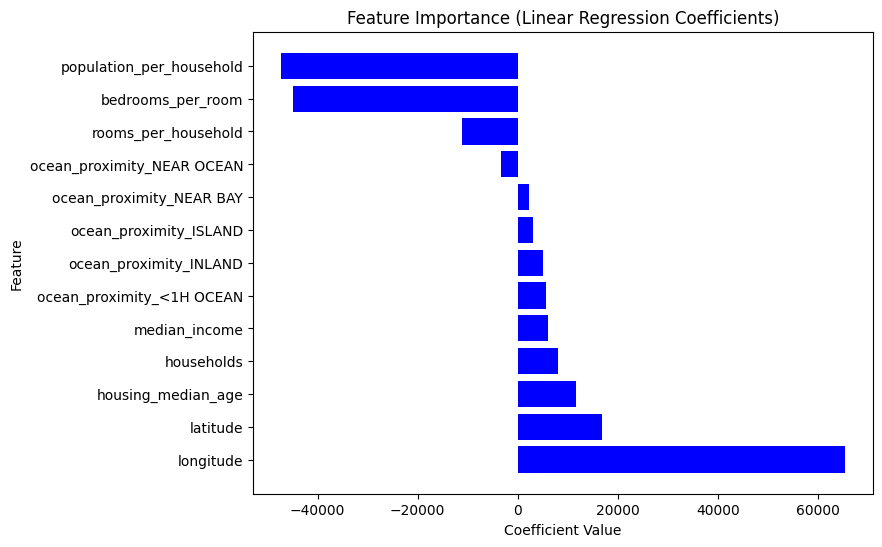

In [76]:
# Sort dataframe by coefficients.
coef_df_sorted = coeff_df.sort_values(by="Coefficient", ascending=False)


# Create plot.
plt.figure(figsize=(8,6))
plt.barh(coeff_df["Feature"], coef_df_sorted["Coefficient"], color="blue")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.title("Feature Importance (Linear Regression Coefficients)")
plt.show()

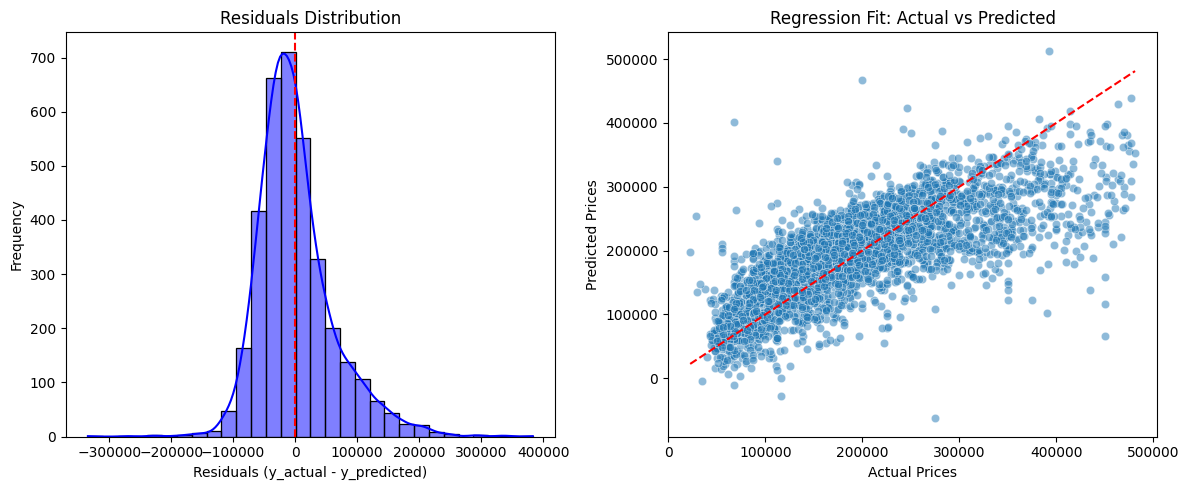

In [77]:
# Compute residuals.
residuals = y_test - y_pred


# Create plots.
plt.figure(figsize=(12,5))


# Plot 1: Residuals Distribution.
plt.subplot(1,2,1)
sns.histplot(residuals, bins=30, kde=True, color="blue")
plt.axvline(x=0, color='red', linestyle='--')
plt.title("Residuals Distribution")
plt.xlabel("Residuals (y_actual - y_predicted)")
plt.ylabel("Frequency")


# Plot 2: Regression Fit (Actual vs Predicted).
plt.subplot(1,2,2)
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Perfect fit line
plt.title("Regression Fit: Actual vs Predicted")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")


# Show plots.
plt.tight_layout()
plt.show()

In [78]:
y_pred

array([227099.20551849, 109592.36965249,  88318.4075138 , ...,
       254782.27172259,  78924.51873572, 148476.26806742])

# Random Forest Regressor

In [79]:
# Import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

# Instantiate Random Forest Regressor model
forest_model = RandomForestRegressor(random_state=42)

# Fit the model to the training data
forest_model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

## Evaluate Performance

In [80]:
# Make predictions on the testing data
y_pred_forest = forest_model.predict(X_test_scaled)

# Calculate and print R^2 score
r2_forest = r2_score(y_test, y_pred_forest)
print(f"Random Forest R-squared: {r2_forest:.4f}")

# Calculate and print MSE
mse_forest = mean_squared_error(y_test, y_pred_forest)
print(f"Random Forest Mean squared error: {mse_forest:.4f}")

# Calculate and print RMSE
rmse_forest = mse_forest ** 0.5
print(f"Random Forest Root mean squared error: {rmse_forest:.4f}")

Random Forest R-squared: 0.7739
Random Forest Mean squared error: 2018951531.8805
Random Forest Root mean squared error: 44932.7445


## Visualize Predictions

Comparison of Actual vs Predicted Values:
         Actual  Predicted
3429   325000.0   336466.0
14820  187500.0   135209.0
1843   153800.0    97541.0
12815   88600.0   104871.0
7137   194600.0   203678.0


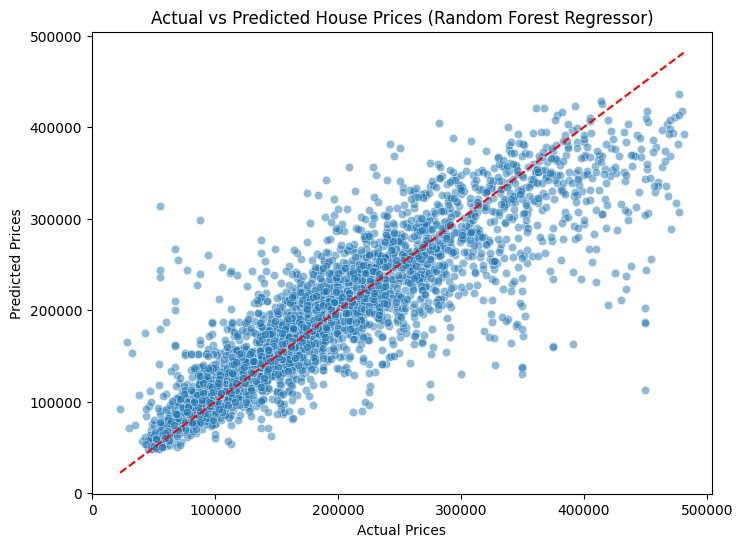

In [81]:
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_forest})
print("Comparison of Actual vs Predicted Values:")
print(comparison_df.head())

# Visualize the comparison (Actual vs Predicted)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_forest, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Perfect fit line
plt.title("Actual vs Predicted House Prices (Random Forest Regressor)")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.show()

## Feature Importance

In [82]:
# Get feature importances from the Random Forest model
feature_importances = forest_model.feature_importances_

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importances
print("Feature Importances (Random Forest Regressor):")
print(feature_importance_df)

# Visualize feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance (Random Forest Regressor)')
plt.gca().invert_yaxis()  # Invert y-axis to show most important features at the top
plt.show()

Feature Importances (Random Forest Regressor):
                       Feature  Importance
4                median_income    0.429179
6       ocean_proximity_INLAND    0.161632
12    population_per_household    0.112200
0                    longitude    0.079710
1                     latitude    0.074166
2           housing_median_age    0.040793
3                   households    0.032546
11           bedrooms_per_room    0.032495
10         rooms_per_household    0.031539
9   ocean_proximity_NEAR OCEAN    0.003044
5    ocean_proximity_<1H OCEAN    0.001505
8     ocean_proximity_NEAR BAY    0.001062
7       ocean_proximity_ISLAND    0.000129
